# Lab 1: Loading and plotting data

Welcome to the first lab!  Here we will: load data, perform some basic operations and plot a few graphs.  We will be analyzing CO2 data from Mauna Loa from 1958 - 2015.  Mauna Loa is a volcano in Hawaii where historical measurements of atmospheric CO2 concentrations have been measured for decades, providing an extraordinarily useful record.

In [1]:
# First, import required libraries
import pandas as pd #this library is helpful for loading data and operations with data
import matplotlib.pyplot as plt #this library is used for plotting
import numpy as np #this library has useful mathematic and numeric tools

In [4]:
# Load data
data = pd.read_csv('Mauna_Loa_CO2_1958_2015_cleaned_comma.csv')

In [5]:
# Check out the first few lines
data.head()

,Year,Month,Decimal date,Average,Interpolated,Trend,#days
0,1958,3,1958.208,315.71,315.71,314.62,-1
1,1958,4,1958.292,317.45,317.45,315.29,-1
2,1958,5,1958.375,317.50,317.50,314.71,-1
3,1958,6,1958.458,-99.99,317.10,314.85,-1
4,1958,7,1958.542,315.86,315.86,314.98,-1


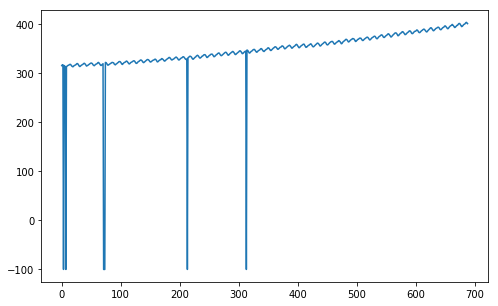

In [6]:
# Let's plot the monthly CO2 values in ppm

plt.figure(figsize=(8,5))
plt.plot(data['Average'])
plt.show()

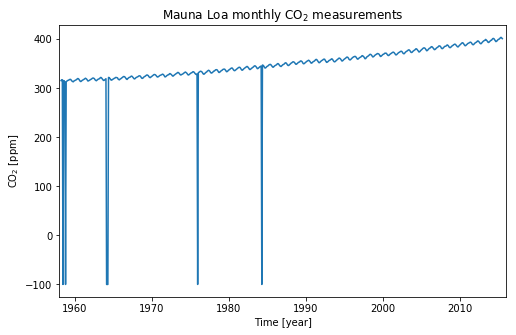

In [7]:
# Improve the plot by adding in a meaningful x-axis
CO2 = data['Average']
time = data['Decimal date']

plt.figure(figsize=(8,5))
plt.plot(time,CO2)
plt.xlim((1958,2016))
plt.xlabel('Time [year]')
plt.ylabel('CO$_2$ [ppm]')
plt.title('Mauna Loa monthly CO$_2$ measurements')
plt.show()

In [8]:
# The plot looks like there are outliers -- let's replace these with NaN
data = data.replace(to_replace = -99.99, value = np.nan) #replace outlier (-99.99) with 'missing' (NaN, here np.nan)
CO2_nan = data['Average']

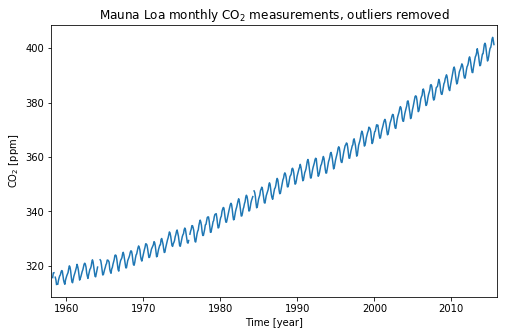

In [9]:
# Visualize data with outliers removed
plt.figure(figsize=(8,5))
plt.plot(time,CO2_nan)
plt.xlim((1958,2016))
plt.xlabel('Time [year]')
plt.ylabel('CO$_2$ [ppm]')
plt.title('Mauna Loa monthly CO$_2$ measurements, outliers removed')
plt.show()

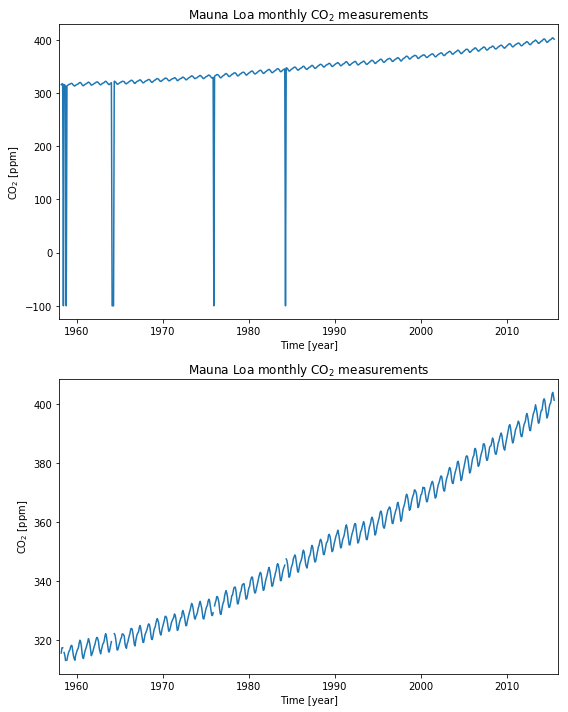

In [10]:
# Now, make a subplot comparing the two cases!

plt.figure(figsize = (8,10))

plt.subplot(2,1,1) ### Read this as subplot(number of rows, number of subplots, current plot)
plt.plot(time,CO2)
plt.xlim(1958,2016)
plt.xlabel('Time [year]')
plt.ylabel('CO$_2$ [ppm]')
plt.title('Mauna Loa monthly CO$_2$ measurements')

plt.subplot(2,1,2)
plt.plot(time,CO2_nan)
plt.xlim(1958,2016)
plt.xlabel('Time [year]')
plt.ylabel('CO$_2$ [ppm]')
plt.title('Mauna Loa monthly CO$_2$ measurements')

plt.tight_layout() #this makes it so axis labels/titles don't overlap in subplots
plt.show()

Text(0.5, 1.0, 'Mauna Loa monthly CO$_2$ measurements')

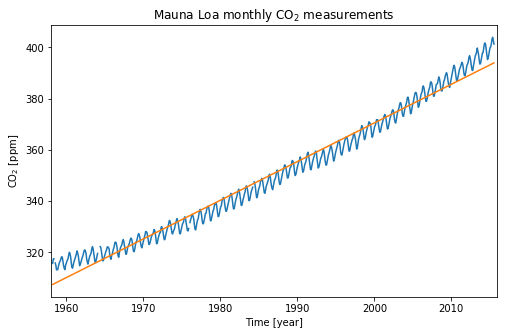

In [11]:
### Next, we will fit a polynomial to this trend.
### Try varying the order to see how this changes the trend line

order = 1
ind = np.isfinite(time) & np.isfinite(CO2_nan) ### polyfit doesn't work with nans, so remove those from the arrays
p = np.polyfit(time[ind], CO2_nan[ind], order)


plt.figure(figsize=(8,5))
plt.plot(time,CO2_nan)
plt.plot(time,np.poly1d(p)(time))
plt.xlim(1958,2016)
plt.xlabel('Time [year]')
plt.ylabel('CO$_2$ [ppm]')
plt.title('Mauna Loa monthly CO$_2$ measurements')

In [12]:
# Now, we want to calculate annual averages
# Since the data covers March 1958 - July 2015, we can remove 2015 (7 months) and 1958 (10 months) so we only compute over complete years

CO2_trim = CO2_nan[10:-7]

# We expect this trimmed data to be 56 years long -- check to make sure
if len(CO2_trim)/12 == 56:
    print('Length of record is correct!')
else:
    print('ERROR: Length of record is incorrect :(')

Length of record is correct!


In [13]:
# Loop through and calculate mean of every 12 months
CO2_annual = [np.nanmean(CO2_trim[ind:ind+12]) for ind in range(0,len(CO2_trim),12)]

In [14]:
# But wait -- what does np.nanmean do?  Let's check!
np.nanmean?

Signature: np.nanmean(a, axis=None, dtype=None, out=None, keepdims=<no value>)
Docstring:
Compute the arithmetic mean along the specified axis, ignoring NaNs.

Returns the average of the array elements.  The average is taken over
the flattened array by default, otherwise over the specified axis.
`float64` intermediate and return values are used for integer inputs.

For all-NaN slices, NaN is returned and a `RuntimeWarning` is raised.

.. versionadded:: 1.8.0

Parameters
----------
a : array_like
    Array containing numbers whose mean is desired. If `a` is not an
    array, a conversion is attempted.
axis : {int, tuple of int, None}, optional
    Axis or axes along which the means are computed. The default is to compute
    the mean of the flattened array.
dtype : data-type, optional
    Type to use in computing the mean.  For integer inputs, the default
    is `float64`; for inexact inputs, it is the same as the input
    dtype.
out : ndarray, optional
    Alternate output array in wh

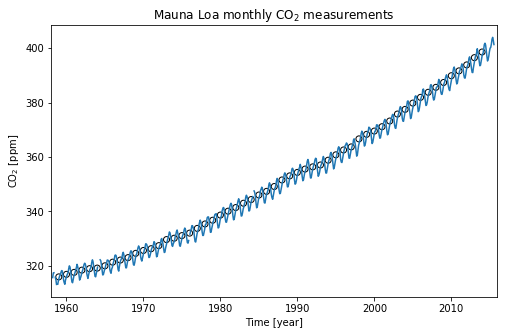

In [15]:
# Now, let's plot the yearly average as a scatter plot overtop of the monthly timeseries

years = range(1959,2015)

plt.figure(figsize = (8,5))

plt.plot(time,CO2_nan)
plt.scatter(years,CO2_annual, facecolor = [], edgecolor = 'k')
plt.xlim(1958,2016)
plt.xlabel('Time [year]')
plt.ylabel('CO$_2$ [ppm]')
plt.title('Mauna Loa monthly CO$_2$ measurements')

plt.show()